# Lösungen

## Konfiguration und Python-Pakete

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Aufgabe 1: Rosenbrock-Funktion

Bestimmen Sie analytisch, dass die [Rosenbrock-Funktion](https://en.wikipedia.org/wiki/Rosenbrock_function)

$$f(x,y) = (a - x)^{2} + b(y - x^{2})^{2}$$

für $a > 0$ und $b > 0$ ein Minimum bei $(a, a^2)$ mit $f(a, a^2)=0$ hat, und erstellen Sie eine Konturlinien-Plot der Funktion für $a = 1$ und $b = 1$.

### Lösung

Einsetzen von $(a, a^2)$ in $f(x,y)$ liefert $f(a,a^2)=0$.
Die ersten partiellen Ableitungen

$$\begin{align}
\frac{\partial f}{\partial x} &= -2(a - x) - 4b(xy - x^3) \\
\frac{\partial f}{\partial y} &= 2b(y - x^2)
\end{align}$$

sind bei $(a,a^2)$ gleich Null:

$$\begin{align}
\frac{\partial f}{\partial x}(a,a^2) &= 0, \\
\frac{\partial f}{\partial y}(a,a^2) &= 0.
\end{align}$$

Die Hessematrix 

$$H(x,y) = 
\begin{pmatrix} 
2 - 4b(y - 3x^2) & -4bx \\
-4bx             & 2b
\end{pmatrix}$$

lautet bei $(a,a^2)$

$$H(a, a^2) = \begin{pmatrix} 
2 + 8a^2 b & -4ba \\
-4ba       & 2b
\end{pmatrix}.$$

In [8]:
a = 1
b = 1

In [9]:
def rb(x, y):
    return (a - y)**2 + b*(y - x**2)**2

In [10]:
rb(a, a**2)

0

In [11]:
H = np.array([[2 + 8*a**2*b, -4*b*a],
              [-4*b*a      , 2*b]])
L, V = np.linalg.eig(H)
for l in L:
    print(f"{l:.2f} ist ein Eigenwert von H.")

11.66 ist ein Eigenwert von H.
0.34 ist ein Eigenwert von H.


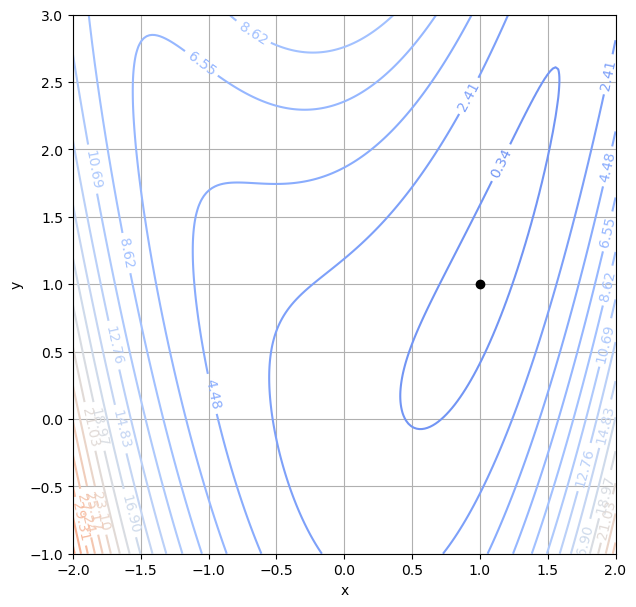

In [12]:
x = np.linspace(-2.0, 2.0, 200)
y = np.linspace(-1.0, 3.0, 200)
X, Y = np.meshgrid(x, y)
Z = (a - X)**2 + b*(Y - X**2)**2

plt.figure(figsize=(7,7))
levels = np.linspace(-10, 50, num=30)
cs = plt.contour(X, Y, Z, levels, cmap='coolwarm')
plt.plot(a, a**2, 'ok')
plt.clabel(cs, inline=1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

## Aufgabe 2: Gradientenverfahren

Es sei die Funktion $f(x, y) = yx + 2x + 6$ gegeben.

1. Bestimmen Sie die Extrempunkte und die Hessematrix dieser Funktion auf analytische Weise, d. h. von Hand. Berechnen Sie anschließend die Eigenwerte der Hessematrix an dieser Stelle. Was sagen diese Werte aus?
2. Dann führen Sie vier Schritte des Gradientenverfahrens mit Python durch, sodass die Funktionswerte größer werden, also Maximierung. Vergleichen Sie die Schritte für die beiden Startwerten $x_0 = (-3, 3)$ und $x_0 = (0, 1)$.
3. Plotten Sie die Höhenlinien der Funktion mit den Schritten des Gradientenverfahrens, also den Schritten $x_k = x_{k-1} + \nabla f(x_{k-1})$.
4. Was ändert sich im Plot, wenn Sie den Startwert ändern? Warum stimmt Ihre analytische Rechnung nicht mit dem Gradientenverfahren überein? Wie ändern sich die Schrittgrößen pro Schritt und warum?

*Hinweise:* Plotten Sie zunächst die Höhenlinien der Funktion mit dem Befehl `contour` aus `matplotlib.pyplot`. Dann definieren Sie die Funktion und den Gradienten der Funktion. Beachten Sie, dass die Ausgabe ein Vektor ist. Berechnen Sie dann in einer for-Schleife die neuen Punkte $x_k = x_{k-1} + \nabla f(x_{k-1})$ und zeichnen Sie diese bis einschließlich $k = 4$. 

### Lösung

  1.0 ist ein Eigenwert von H.
 -1.0 ist ein Eigenwert von H.


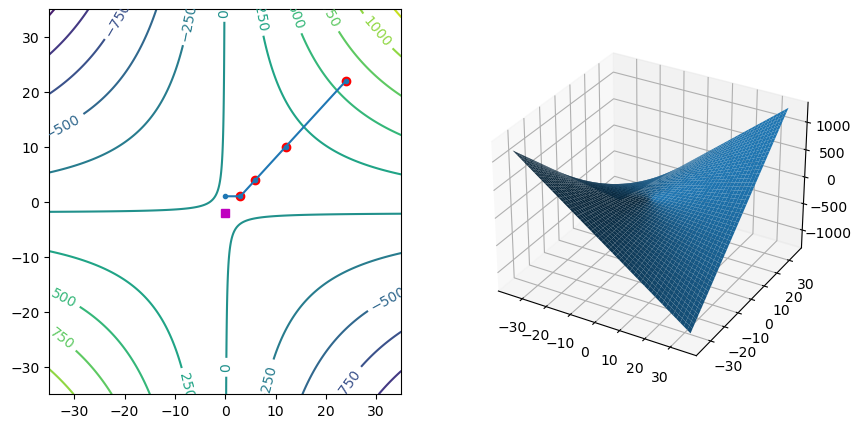

In [13]:
# 1) eine Extemstelle: x_opt = (0, -2) 

# 2) und 3)
def f(x):
    return x[1]*x[0] + 2*x[0] + 6

def gradf(x):
    gx = x[1] + 2
    gy = x[0]
    return np.array([gx, gy])

x = np.linspace(-35, 35, 500)
y = np.linspace(-35, 35, 500)
X, Y = np.meshgrid(x, y)
F = X*Y + 2*X + 6

# 3-d vizualization of function (not necessary for excercise):
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, F)

plt.subplot(1, 2, 1)
CS = plt.contour(X, Y, F, 10)
plt.clabel(CS, inline=True, fontsize=10)

# x = np.array([-3, -3])   # start value 1
x = np.array([0, 1])     # start value 2

lst = [x]
for i in range(1, 5):
    x = x + gradf(x)
    plt.plot(x[0], x[1], "or")
    lst.append(x)

lst_array = np.array(lst)
plt.plot(lst_array[:, 0], lst_array[:, 1], ".-")

plt.plot(0, -2, 'sm')

# 4) Eigenwerte der Hesse-Matrix => nicht definit, Sattelpunkt:
H = np.array([[0, 1],
              [1, 0]])
L, V = np.linalg.eig(H)
for l in L:
    print(f"{l:5.1f} ist ein Eigenwert von H.")

1) Eine Extemstelle (flache Tangentialebene): $x_{\text{opt}} = (0, -2)$. Die Hessematrix lautet $H(x, y) = \left(
\begin{array}{cc}
0 & 1\\
1 & 0\\
\end{array}
\right) $ und ist weder positiv noch negativ definit, da sie die Eigenwerte 1 und -1 hat, siehe Code. Daher ist $x_{\text{opt}}$ ein Sattelpunkt.
2. Wenn der Startwert geändert wird, ändert sich der Pfad. Dies liegt daran, dass der steilste Pfad davon abhängt, wo Sie sich befinden.
3. Aus den Höhenlinien ist ersichtlich, dass der Weg umso steiler wird, je weiter wir gehen, und damit auch die Länge des Gradienten (Schrittweiten werden größer).
4. Der Punkt $x_{\text{opt}} = (0, -2)$ ist ein Sattelpunkt.

## Aufgabe 3: Richtungsableitung

Bisher haben wir den Gradienten kennengelernt, der die Steigungen einer Funktion entlang der $x$- und $y$-Achsen enthält. Wenn wir jedoch die Steigung entlang einer Richtung $d$ wissen wollen, müssen wir die Richtungsableitung $\nabla f(x) \cdot d$ bilden (Inneres Produkt des Gradienten mit der Richtung $d$). Man verwendet nur Richtungen der Länge eins, d. h. $|| d || = 1$.

Begründen Sie anhand der Richtungsableitung und der Gleichung $x \cdot y = || x || \, || y || \, \cos(\alpha)$, warum die Richtung des größten Anstiegs die Richtung des Gradienten sein muss.

### Lösung

Für eine beibige Richtung $d$ haben wir $\nabla f(x) \cdot d = \lVert \nabla f(x) \rVert \, \lVert d \rVert \, \cos(\alpha) = \lVert \nabla f(x) \rVert \, \cos(\alpha)$. Dieser Ausdruck wird maximal, wenn $\cos(\alpha) = 1$. Damit muss die Richtung $d$ für maximale Steigung ein skalares Vielfaches des Gradienten sein.